In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_noisy = pd.read_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\noisy_data.csv', index_col=0, parse_dates=['date'])
df_noisy.head()

,sequence_name,tag_position,date,x_coord,y_coord,z_coord,activity,vx,vy,vz
7,A01,Ankle_Left,2009-05-27 14:03:25.343,3.958496,1.703563,0.511041,walking,-1.220181,-1.664489,0.415641
9,A01,Ankle_Left,2009-05-27 14:03:25.453,4.016991,1.734065,0.193167,walking,0.531769,0.277292,-2.889769
13,A01,Ankle_Left,2009-05-27 14:03:25.560,3.748375,2.073422,0.254482,walking,-2.510430,3.171565,0.573036
15,A01,Ankle_Left,2009-05-27 14:03:25.670,3.820894,2.049378,0.055377,walking,0.659266,-0.218586,-1.810044
19,A01,Ankle_Left,2009-05-27 14:03:25.777,4.039506,1.908465,0.453817,walking,2.043107,-1.316940,3.723740


In [3]:
df_noisy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161314 entries, 7 to 164857
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sequence_name  161314 non-null  object        
 1   tag_position   161314 non-null  object        
 2   date           161314 non-null  datetime64[ns]
 3   x_coord        161314 non-null  float64       
 4   y_coord        161314 non-null  float64       
 5   z_coord        161314 non-null  float64       
 6   activity       161314 non-null  object        
 7   vx             161314 non-null  float64       
 8   vy             161314 non-null  float64       
 9   vz             161314 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 13.5+ MB


In [4]:
def resamp(df, tag, freq='S'):
    df1 = df.resample(freq).mean()
    df1['activity'] = df.resample(freq)['activity'].describe()['top']
    df1.rename(columns={'x_coord':'x_'+tag, 'y_coord':'y_'+tag, 'z_coord':'z_'+tag, 'vx':'vx_'+tag, 'vy':'vy_'+tag, 'vz':'vz_'+tag, 'activity':'activity_'+tag}, inplace=True)
    return df1

In [5]:
df = pd.DataFrame()
for i in df_noisy.sequence_name.unique():
    df_temp2 = pd.DataFrame()
    for j in df_noisy.tag_position.unique():
        df_temp1 = resamp(df_noisy[(df_noisy['sequence_name']==i)&(df_noisy['tag_position']==j)].set_index('date'), j)
        df_temp2 = pd.concat([df_temp2, df_temp1], axis=1)
    df_temp2['sequence_name']=i
    df = df.append(df_temp2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5481 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:42
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5448 non-null   float64
 1   y_Ankle_Left          5448 non-null   float64
 2   z_Ankle_Left          5448 non-null   float64
 3   vx_Ankle_Left         5448 non-null   float64
 4   vy_Ankle_Left         5448 non-null   float64
 5   vz_Ankle_Left         5448 non-null   float64
 6   activity_Ankle_Left   5448 non-null   object 
 7   x_Ankle_Right         5454 non-null   float64
 8   y_Ankle_Right         5454 non-null   float64
 9   z_Ankle_Right         5454 non-null   float64
 10  vx_Ankle_Right        5454 non-null   float64
 11  vy_Ankle_Right        5454 non-null   float64
 12  vz_Ankle_Right        5454 non-null   float64
 13  activity_Ankle_Right  5454 non-null   object 
 14  x_Belt                5433 non-null 

In [7]:
df.loc[df.isnull().any(axis=1), :]

,x_Ankle_Left,y_Ankle_Left,z_Ankle_Left,vx_Ankle_Left,vy_Ankle_Left,vz_Ankle_Left,activity_Ankle_Left,x_Ankle_Right,y_Ankle_Right,z_Ankle_Right,...,vz_Belt,activity_Belt,x_Chest,y_Chest,z_Chest,vx_Chest,vy_Chest,vz_Chest,activity_Chest,sequence_name
date,,,,,,,,,,,,,,,,,,,,,
2009-05-27 14:03:42,3.243023,1.903068,0.040044,0.115825,-0.154834,0.028395,sitting,NaN,NaN,NaN,...,-0.042460,sitting,2.917000,2.516177,0.975921,-0.019752,-0.000092,-0.007697,sitting,A01
2009-05-27 14:03:43,3.145547,1.989468,-0.057200,-0.153293,0.168814,-0.409743,sitting,NaN,NaN,NaN,...,0.029358,sitting,2.929863,2.533940,0.944163,0.022422,0.059922,0.051721,sitting,A01
2009-05-27 14:03:44,3.202059,1.927342,-0.146648,0.087584,-0.208338,0.353210,sitting,NaN,NaN,NaN,...,0.094103,sitting,2.924705,2.586177,0.955786,0.169039,-0.069993,-0.268736,sitting,A01
2009-05-27 14:03:45,3.206395,1.895523,0.057942,0.007635,0.053486,0.010631,standing up from sitting,NaN,NaN,NaN,...,-0.295960,standing up from sitting,3.106200,2.051420,0.822356,0.114955,-0.587277,0.074217,standing up from sitting,A01
2009-05-27 14:06:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991685,1.947347,-0.052446,...,NaN,NaN,3.235618,2.079932,1.194062,0.121858,0.779492,0.937186,walking,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-05-27 11:45:47,1.028347,1.149021,-0.235507,0.596992,0.025380,1.340872,walking,1.034610,1.315100,0.041976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E05
2009-05-27 11:46:24,1.910787,1.748974,0.183007,-0.966959,0.122263,-0.096681,walking,2.162201,1.774064,0.323063,...,0.166002,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E05
2009-05-27 11:47:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.285454,2.108204,0.197686,...,-0.078360,lying,1.205439,2.434305,0.503542,-0.030197,0.040018,-0.107801,lying,E05


In [8]:
df.dropna(inplace=True)

In [9]:
df.loc[df.isnull().any(axis=1), :]

,x_Ankle_Left,y_Ankle_Left,z_Ankle_Left,vx_Ankle_Left,vy_Ankle_Left,vz_Ankle_Left,activity_Ankle_Left,x_Ankle_Right,y_Ankle_Right,z_Ankle_Right,...,vz_Belt,activity_Belt,x_Chest,y_Chest,z_Chest,vx_Chest,vy_Chest,vz_Chest,activity_Chest,sequence_name
date,,,,,,,,,,,,,,,,,,,,,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5334 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5334 non-null   float64
 1   y_Ankle_Left          5334 non-null   float64
 2   z_Ankle_Left          5334 non-null   float64
 3   vx_Ankle_Left         5334 non-null   float64
 4   vy_Ankle_Left         5334 non-null   float64
 5   vz_Ankle_Left         5334 non-null   float64
 6   activity_Ankle_Left   5334 non-null   object 
 7   x_Ankle_Right         5334 non-null   float64
 8   y_Ankle_Right         5334 non-null   float64
 9   z_Ankle_Right         5334 non-null   float64
 10  vx_Ankle_Right        5334 non-null   float64
 11  vy_Ankle_Right        5334 non-null   float64
 12  vz_Ankle_Right        5334 non-null   float64
 13  activity_Ankle_Right  5334 non-null   object 
 14  x_Belt                5334 non-null 

In [11]:
mask = (df['activity_Ankle_Left']==df['activity_Ankle_Right'])&(df['activity_Ankle_Right']==df['activity_Belt'])&(df['activity_Belt']==df['activity_Chest'])

In [12]:
df[~mask]

,x_Ankle_Left,y_Ankle_Left,z_Ankle_Left,vx_Ankle_Left,vy_Ankle_Left,vz_Ankle_Left,activity_Ankle_Left,x_Ankle_Right,y_Ankle_Right,z_Ankle_Right,...,vz_Belt,activity_Belt,x_Chest,y_Chest,z_Chest,vx_Chest,vy_Chest,vz_Chest,activity_Chest,sequence_name
date,,,,,,,,,,,,,,,,,,,,,
2009-05-27 14:04:40,3.362491,1.264681,0.340885,0.305919,-0.373542,-0.455377,falling,3.310933,1.338161,0.368873,...,-0.104081,walking,3.498174,1.586447,1.322729,0.133599,-0.031570,-0.027518,walking,A01
2009-05-27 14:05:06,2.924968,1.549872,0.119655,-0.141810,0.311175,0.004951,sitting,3.434011,1.243796,0.460031,...,0.196158,sitting,3.007513,1.376787,0.986553,-0.400229,-0.417131,-0.228222,sitting down,A01
2009-05-27 14:06:12,1.860886,1.931271,0.196589,-0.000515,-0.060178,-0.067157,walking,2.149414,2.172647,0.270059,...,9.626458,standing up from lying,1.809521,1.860035,1.124521,-0.259059,-0.095907,0.229142,walking,A01
2009-05-27 14:10:51,3.239925,1.597936,0.201917,0.349273,0.121055,-0.415347,lying,3.385645,1.426167,0.602845,...,-0.920037,falling,4.578415,1.327534,0.159986,0.642258,0.499254,-0.178559,lying,A02
2009-05-27 14:11:33,2.649537,2.400126,0.532133,0.017288,0.075027,-0.015192,lying,2.608898,2.225830,0.519049,...,0.149314,standing up from lying,1.264992,2.303339,0.769183,0.106124,0.257032,0.780260,standing up from lying,A02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-05-27 11:46:34,3.130117,1.402356,0.617186,0.601344,-0.382238,0.511215,falling,3.472508,1.103551,0.370750,...,-1.178470,falling,4.336126,1.391414,0.496670,0.784785,-0.175868,-1.185476,lying,E05
2009-05-27 11:47:43,2.065908,1.936933,0.200775,-0.057872,0.052738,-0.026151,walking,1.973237,1.908538,0.246966,...,0.300620,walking,2.044369,1.864499,1.050823,-0.209582,0.079171,0.114263,walking,E05
2009-05-27 11:48:27,3.454868,2.016058,-0.156864,-0.103854,-0.158261,-0.331276,walking,3.437239,2.079384,0.452168,...,-0.139026,walking,3.454623,2.131212,1.384455,0.384689,0.008402,0.180892,walking,E05


In [13]:
df.drop(index=df[~mask].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5227 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5227 non-null   float64
 1   y_Ankle_Left          5227 non-null   float64
 2   z_Ankle_Left          5227 non-null   float64
 3   vx_Ankle_Left         5227 non-null   float64
 4   vy_Ankle_Left         5227 non-null   float64
 5   vz_Ankle_Left         5227 non-null   float64
 6   activity_Ankle_Left   5227 non-null   object 
 7   x_Ankle_Right         5227 non-null   float64
 8   y_Ankle_Right         5227 non-null   float64
 9   z_Ankle_Right         5227 non-null   float64
 10  vx_Ankle_Right        5227 non-null   float64
 11  vy_Ankle_Right        5227 non-null   float64
 12  vz_Ankle_Right        5227 non-null   float64
 13  activity_Ankle_Right  5227 non-null   object 
 14  x_Belt                5227 non-null 

In [15]:
df.drop(columns=['activity_Ankle_Left', 'activity_Ankle_Right', 'activity_Belt'], inplace=True)

In [16]:
df.rename(columns={'activity_Chest':'activity'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5227 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x_Ankle_Left    5227 non-null   float64
 1   y_Ankle_Left    5227 non-null   float64
 2   z_Ankle_Left    5227 non-null   float64
 3   vx_Ankle_Left   5227 non-null   float64
 4   vy_Ankle_Left   5227 non-null   float64
 5   vz_Ankle_Left   5227 non-null   float64
 6   x_Ankle_Right   5227 non-null   float64
 7   y_Ankle_Right   5227 non-null   float64
 8   z_Ankle_Right   5227 non-null   float64
 9   vx_Ankle_Right  5227 non-null   float64
 10  vy_Ankle_Right  5227 non-null   float64
 11  vz_Ankle_Right  5227 non-null   float64
 12  x_Belt          5227 non-null   float64
 13  y_Belt          5227 non-null   float64
 14  z_Belt          5227 non-null   float64
 15  vx_Belt         5227 non-null   float64
 16  vy_Belt         5227 non-null   float64
 1

In [18]:
df.head()

,x_Ankle_Left,y_Ankle_Left,z_Ankle_Left,vx_Ankle_Left,vy_Ankle_Left,vz_Ankle_Left,x_Ankle_Right,y_Ankle_Right,z_Ankle_Right,vx_Ankle_Right,...,vy_Belt,vz_Belt,x_Chest,y_Chest,z_Chest,vx_Chest,vy_Chest,vz_Chest,activity,sequence_name
date,,,,,,,,,,,,,,,,,,,,,
2009-05-27 14:03:25,3.949630,1.900182,0.344101,-0.079711,0.035407,-0.001367,4.397413,1.884623,0.541615,0.187762,...,0.138495,0.231894,4.266197,2.044952,1.361703,-0.230549,0.679089,0.195658,walking,A01
2009-05-27 14:03:26,3.917165,1.931733,0.385538,-0.076668,-0.136994,-0.077359,4.400462,1.924077,0.451020,0.095132,...,0.012306,-0.041263,4.224487,2.099005,1.343999,-0.036045,-0.087481,-0.116864,walking,A01
2009-05-27 14:03:27,3.972112,1.911377,0.270892,-0.013374,0.165018,-0.173723,4.246819,1.971187,0.378625,-0.723113,...,-0.210173,-0.113544,4.242987,1.708852,1.238243,-0.400486,-0.039284,-0.066494,walking,A01
2009-05-27 14:03:28,3.813769,1.960127,0.238826,-0.887688,0.057083,-0.730547,3.519329,2.044926,0.279882,-0.459889,...,0.209605,-0.136504,3.602022,1.914348,1.166328,-0.600955,0.228505,-0.174320,walking,A01
2009-05-27 14:03:29,3.103102,1.863375,-0.119401,0.037925,0.053552,0.005987,3.160081,2.149590,0.058288,-0.601484,...,-0.478712,-0.006246,3.251345,1.881694,1.067989,-0.207224,-0.152918,-0.184875,sitting down,A01


In [19]:
df.describe()

,x_Ankle_Left,y_Ankle_Left,z_Ankle_Left,vx_Ankle_Left,vy_Ankle_Left,vz_Ankle_Left,x_Ankle_Right,y_Ankle_Right,z_Ankle_Right,vx_Ankle_Right,...,z_Belt,vx_Belt,vy_Belt,vz_Belt,x_Chest,y_Chest,z_Chest,vx_Chest,vy_Chest,vz_Chest
count,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,...,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000
mean,2.892194,1.732887,0.244385,0.000763,-0.000018,-0.001198,2.859645,1.677256,0.236200,0.005343,...,0.527444,0.009794,0.005419,0.010105,2.728528,1.696346,0.690542,0.003307,-0.000819,0.001784
std,0.685304,0.423739,0.217252,0.290686,0.281280,0.259202,0.716362,0.420916,0.207441,0.312398,...,0.296216,0.525360,0.381029,0.346281,1.170703,0.486640,0.404658,0.393145,0.306023,0.293980
min,0.436510,0.402867,-0.688003,-2.946407,-3.150650,-3.017377,0.713079,0.224017,-0.808868,-2.216319,...,-0.817816,-6.583235,-5.376432,-2.567182,0.442039,-0.134738,-0.700609,-6.717074,-4.580270,-6.286113
25%,2.513701,1.391980,0.098222,-0.082135,-0.103141,-0.104940,2.439512,1.358900,0.104373,-0.089477,...,0.304234,-0.109001,-0.112192,-0.102291,1.632761,1.328767,0.338484,-0.103552,-0.110307,-0.102568
50%,2.936746,1.695326,0.249928,0.001248,0.001363,0.000345,2.878488,1.676733,0.250607,0.000767,...,0.511509,0.001255,-0.000028,0.001052,2.755149,1.589802,0.651795,0.001074,-0.001020,0.002518
75%,3.361384,1.995496,0.399792,0.085976,0.100287,0.100727,3.387070,1.985775,0.382639,0.090970,...,0.773533,0.121388,0.117913,0.113355,3.508256,2.122738,1.024758,0.111560,0.108295,0.106489
max,4.887819,3.010681,1.743137,2.487181,3.545487,2.547613,5.244433,2.814089,1.031581,4.613234,...,1.726200,6.361052,9.332507,4.157009,5.493141,3.695088,1.902222,4.507927,2.898207,3.036914


In [20]:
df.describe(include='object')

,activity,sequence_name
count,5227,5227
unique,11,25
top,lying,E01
freq,1752,294


In [21]:
df.activity.value_counts()

lying                                     1752
walking                                   1061
sitting                                    858
standing up from lying                     575
sitting on the ground                      384
lying down                                 184
on all fours                               165
standing up from sitting on the ground      88
falling                                     78
sitting down                                44
standing up from sitting                    38
Name: activity, dtype: int64

In [22]:
df.activity.value_counts(normalize=True)

lying                                     0.335183
walking                                   0.202985
sitting                                   0.164148
standing up from lying                    0.110006
sitting on the ground                     0.073465
lying down                                0.035202
on all fours                              0.031567
standing up from sitting on the ground    0.016836
falling                                   0.014923
sitting down                              0.008418
standing up from sitting                  0.007270
Name: activity, dtype: float64

In [23]:
# Defining a function to calculate distance between two z coordinates
def z_dist(z1, z2):
    z_d = z2-z1
    return z_d

# Defining a function to calculate absolute distance
def abs_dist(x1, y1, z1, x2, y2, z2):
    abs_d = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return abs_d

# Defining a function to calculate absolute distance between each combination of tag
def abs_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = abs_dist(df['x_'+tag[i]], df['y_'+tag[i]], df['z_'+tag[i]], df['x_'+tag[j]], df['y_'+tag[j]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

# Defining a function to distance in z direction between each combination of tag
def z_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = z_dist(df['z_'+tag[i]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

In [24]:
# Defining reference attributes (initializing this as dataframe RA)

# Defining z coordinate of each tag and vz of each tag
RA = df[['z_Ankle_Left', 'z_Ankle_Right', 'z_Belt', 'z_Chest', 'vz_Ankle_Left', 'vz_Ankle_Right', 'vz_Belt', 'vz_Chest']]

# Defining absolute velocity of each tag
RA['abs_v_Ankle_Left'] = np.sqrt(df['vx_Ankle_Left']**2+df['vy_Ankle_Left']**2+df['vz_Ankle_Left']**2)
RA['abs_v_Ankle_Right'] = np.sqrt(df['vx_Ankle_Right']**2+df['vy_Ankle_Right']**2+df['vz_Ankle_Right']**2)
RA['abs_v_Belt'] = np.sqrt(df['vx_Belt']**2+df['vy_Belt']**2+df['vz_Belt']**2)
RA['abs_v_Chest'] = np.sqrt(df['vx_Chest']**2+df['vy_Chest']**2+df['vz_Chest']**2)

tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']

# Defining absolute distance between each combination of tags
RA = pd.concat([RA, abs_dist_calc(df, tag, 'abs_dist')], axis=1)

# Defining distance in z direction between each combination of tags
RA = pd.concat([RA, z_dist_calc(df, tag, 'z_dist')], axis=1)

C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [25]:
RA.head()

,z_Ankle_Left,z_Ankle_Right,z_Belt,z_Chest,vz_Ankle_Left,vz_Ankle_Right,vz_Belt,vz_Chest,abs_v_Ankle_Left,abs_v_Ankle_Right,...,abs_dist_Ankle_Left_Chest,abs_dist_Ankle_Right_Belt,abs_dist_Ankle_Right_Chest,abs_dist_Belt_Chest,z_dist_Ankle_Left_Ankle_Right,z_dist_Ankle_Left_Belt,z_dist_Ankle_Left_Chest,z_dist_Ankle_Right_Belt,z_dist_Ankle_Right_Chest,z_dist_Belt_Chest
date,,,,,,,,,,,,,,,,,,,,,
2009-05-27 14:03:25,0.344101,0.541615,0.966463,1.361703,-0.001367,0.182205,0.231894,0.195658,0.087232,0.644690,...,1.075494,0.425433,0.845853,0.448744,0.197514,0.622362,1.017602,0.424848,0.820088,0.395240
2009-05-27 14:03:26,0.385538,0.451020,1.001638,1.343999,-0.077359,-0.072052,-0.041263,-0.116864,0.175014,0.145237,...,1.020330,0.551286,0.926811,0.412280,0.065482,0.616100,0.958461,0.550618,0.892980,0.342361
2009-05-27 14:03:27,0.270892,0.378625,0.911223,1.238243,-0.173723,-0.390719,-0.113544,-0.066494,0.239978,0.882407,...,1.024772,0.543142,0.898765,0.380703,0.107733,0.640331,0.967351,0.532598,0.859618,0.327020
2009-05-27 14:03:28,0.238826,0.279882,0.814996,1.166328,-0.730547,-0.030818,-0.136504,-0.174320,1.151064,0.465067,...,0.952467,0.565298,0.899820,0.445874,0.041056,0.576171,0.927503,0.535114,0.886446,0.351332
2009-05-27 14:03:29,-0.119401,0.058288,0.720816,1.067989,0.005987,0.036619,-0.006246,-0.184875,0.065893,0.695165,...,1.196748,0.706657,1.048615,0.349209,0.177688,0.840217,1.187390,0.662529,1.009701,0.347173


In [26]:
RA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5227 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5227 non-null   float64
 1   z_Ankle_Right                    5227 non-null   float64
 2   z_Belt                           5227 non-null   float64
 3   z_Chest                          5227 non-null   float64
 4   vz_Ankle_Left                    5227 non-null   float64
 5   vz_Ankle_Right                   5227 non-null   float64
 6   vz_Belt                          5227 non-null   float64
 7   vz_Chest                         5227 non-null   float64
 8   abs_v_Ankle_Left                 5227 non-null   float64
 9   abs_v_Ankle_Right                5227 non-null   float64
 10  abs_v_Belt                       5227 non-null   float64
 11  abs_v_Chest                      5227 non-null

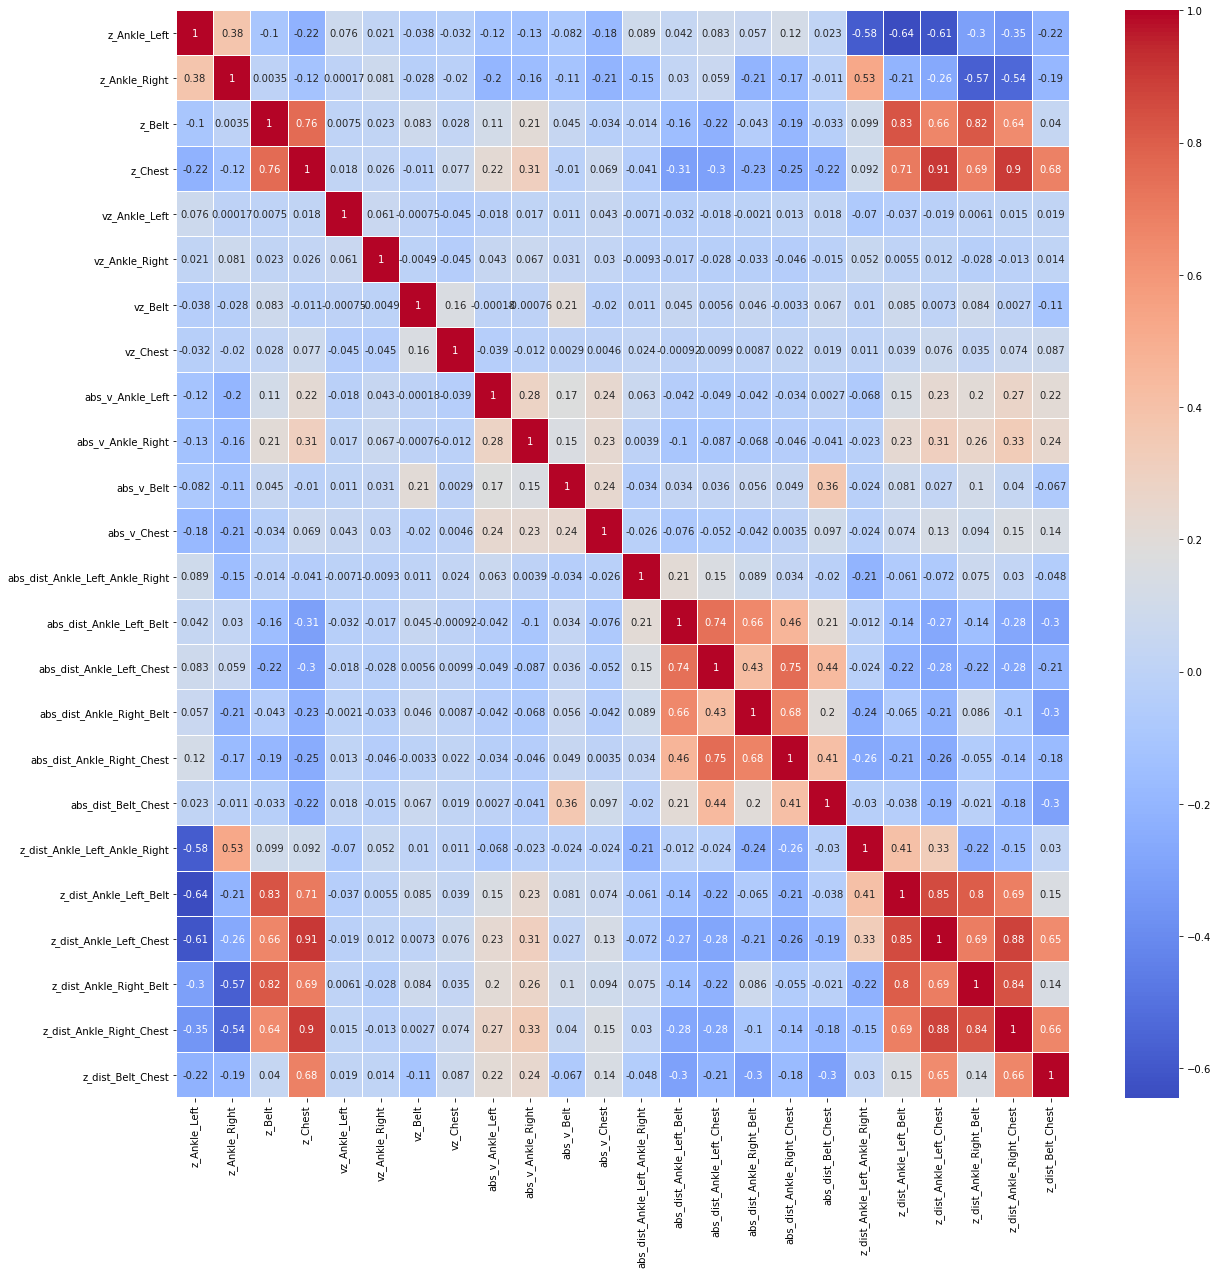

In [27]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [28]:
# Defining Body Attributes

ox, oy, oz = df['x_Belt'], df['y_Belt'], df['z_Belt'] # defining origin as the coordinates of belt tag

kx, ky, kz = df['x_Chest']-ox, df['y_Chest']-oy, df['z_Chest']-oz # defining z direction of body reference
kx, ky, kz = kx/np.sqrt(kx**2+ky**2+kz**2), ky/np.sqrt(kx**2+ky**2+kz**2), kz/np.sqrt(kx**2+ky**2+kz**2) # converting to unit vector

jx, jy, jz = 1, 1, -(kx+ky)/kz # assuming y direction of body reference such that j.k=0
jx, jy, jz = jx/np.sqrt(jx**2+jy**2+jz**2), jy/np.sqrt(jx**2+jy**2+jz**2), jz/np.sqrt(jx**2+jy**2+jz**2) # converting to unit vector

ix, iy, iz = (jy*kz-ky*jz), -(jx*kz-jz*kx), (jx*ky-kx*jy) # calculating x direction of body reference by jxk

# Create a Dataframe which is used for transformation
pos_vect = pd.DataFrame({'ox':ox, 'oy':oy, 'oz':oz, 'ix':ix, 'iy':iy, 'iz':iz, 'jx':jx, 'jy':jy, 'jz':jz, 'kx':kx, 'ky':ky, 'kz':kz})

# Defining Transformed Coordinates
def trans_pos(pos_vect, pos):
    o_vect = np.array([pos_vect.ox, pos_vect.oy, pos_vect.oz]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

In [29]:
BA = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['x_'+j].iloc[i], df['y_'+j].iloc[i], df['z_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_pos(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    BA = pd.concat([BA, pd.DataFrame({'x_b_'+j:s1, 'y_b_'+j:s2, 'z_b_'+j:s3})], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x_b_Ankle_Left   5227 non-null   float64
 1   y_b_Ankle_Left   5227 non-null   float64
 2   z_b_Ankle_Left   5227 non-null   float64
 3   x_b_Ankle_Right  5227 non-null   float64
 4   y_b_Ankle_Right  5227 non-null   float64
 5   z_b_Ankle_Right  5227 non-null   float64
 6   x_b_Chest        5227 non-null   float64
 7   y_b_Chest        5227 non-null   float64
 8   z_b_Chest        5227 non-null   float64
dtypes: float64(9)
memory usage: 367.6 KB


In [30]:
BA.head()

,x_b_Ankle_Left,y_b_Ankle_Left,z_b_Ankle_Left,x_b_Ankle_Right,y_b_Ankle_Right,z_b_Ankle_Right,x_b_Chest,y_b_Chest,z_b_Chest
0,-0.588553,-0.328298,-0.389417,-0.206749,-0.022265,-0.371151,0.000000e+00,8.881784e-16,0.448744
1,-0.623901,-0.283469,-0.343675,-0.288826,0.048844,-0.467023,0.000000e+00,8.881784e-16,0.412280
2,0.134139,-0.281814,-0.595384,0.246829,-0.026192,-0.483107,-4.440892e-16,-8.881784e-16,0.380703
3,0.549110,0.475046,-0.170570,0.330856,0.321528,-0.326674,0.000000e+00,0.000000e+00,0.445874
4,0.029987,-0.157330,-0.836773,-0.148644,0.091139,-0.684808,-3.330669e-16,0.000000e+00,0.349209


In [31]:
# For velocity reference velocity will be 0,0,0 only and the velocity components
def trans_vel(pos_vect, pos):
    o_vect = np.array([0, 0, 0]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

# Creating Velocity Dataframe
Vel_df = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['vx_'+j].iloc[i], df['vy_'+j].iloc[i], df['vz_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_vel(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    Vel_df = pd.concat([Vel_df, pd.DataFrame({'vx_b_'+j:s1, 'vy_b_'+j:s2, 'vz_b_'+j:s3})], axis=1)
Vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vx_b_Ankle_Left   5227 non-null   float64
 1   vy_b_Ankle_Left   5227 non-null   float64
 2   vz_b_Ankle_Left   5227 non-null   float64
 3   vx_b_Ankle_Right  5227 non-null   float64
 4   vy_b_Ankle_Right  5227 non-null   float64
 5   vz_b_Ankle_Right  5227 non-null   float64
 6   vx_b_Belt         5227 non-null   float64
 7   vy_b_Belt         5227 non-null   float64
 8   vz_b_Belt         5227 non-null   float64
 9   vx_b_Chest        5227 non-null   float64
 10  vy_b_Chest        5227 non-null   float64
 11  vz_b_Chest        5227 non-null   float64
dtypes: float64(12)
memory usage: 490.2 KB


In [32]:
Vel_df.head()

,vx_b_Ankle_Left,vy_b_Ankle_Left,vz_b_Ankle_Left,vx_b_Ankle_Right,vy_b_Ankle_Right,vz_b_Ankle_Right,vx_b_Belt,vy_b_Belt,vz_b_Belt,vx_b_Chest,vy_b_Chest,vz_b_Chest
0,-0.072313,-0.031330,0.037399,0.570456,-0.283494,-0.099171,0.087675,0.171392,0.215749,-0.474179,0.317565,0.476343
1,-0.011944,-0.146696,-0.094697,0.064925,0.012604,-0.129305,-0.021998,0.020023,-0.033701,-0.037172,-0.080923,-0.121157
2,-0.021298,0.061828,-0.230897,-0.509783,-0.370663,-0.617553,-0.071967,-0.402973,-0.056015,-0.231284,-0.317803,-0.108916
3,-0.069696,-0.316510,-1.104496,-0.240802,-0.255873,-0.304682,-0.367557,-0.232723,-0.513176,-0.350479,-0.191983,-0.532969
4,-0.011384,0.064847,0.002671,-0.671229,-0.178909,-0.026405,0.156942,-0.518007,0.027292,-0.020109,-0.260685,-0.179285


In [33]:
# Creating Absolute Velocity of each tag
BA['abs_v_b_Ankle_Left'] = np.sqrt(Vel_df['vx_b_Ankle_Left']**2+Vel_df['vy_b_Ankle_Left']**2+Vel_df['vz_b_Ankle_Left']**2)
BA['abs_v_b_Ankle_Right'] = np.sqrt(Vel_df['vx_b_Ankle_Right']**2+Vel_df['vy_b_Ankle_Right']**2+Vel_df['vz_b_Ankle_Right']**2)
BA['abs_v_b_Belt'] = np.sqrt(Vel_df['vx_b_Belt']**2+Vel_df['vy_b_Belt']**2+Vel_df['vz_b_Belt']**2)
BA['abs_v_b_Chest'] = np.sqrt(Vel_df['vx_b_Chest']**2+Vel_df['vy_b_Chest']**2+Vel_df['vz_b_Chest']**2)

In [34]:
# Creating z coordinate and absolute velocity of origin i.e. belt
BA['z_orig'] = df.reset_index().z_Belt
BA['v_or'] = np.sqrt(df.reset_index()['vx_Belt']**2+df.reset_index()['vy_Belt']**2+df.reset_index()['vz_Belt']**2)

In [35]:
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   x_b_Chest            5227 non-null   float64
 7   y_b_Chest            5227 non-null   float64
 8   z_b_Chest            5227 non-null   float64
 9   abs_v_b_Ankle_Left   5227 non-null   float64
 10  abs_v_b_Ankle_Right  5227 non-null   float64
 11  abs_v_b_Belt         5227 non-null   float64
 12  abs_v_b_Chest        5227 non-null   float64
 13  z_orig               5227 non-null   float64
 14  v_or                 5227 non-null   float64
dtypes: float64(15)
memory usage: 612.7 KB


In [36]:
# Creating Angles of movement of tag w.r.t z axis and xz plane
# Angles are denoted by the dot product of the two vectors hence we will calculate the dot product of velocities
# of the tag wit z axis and y axis (because 90-angle with y axis is angle with xz plane)
# Dot product of velocity of each tag with z axis is basically vz_b_ and with y axis is vy_b_
temp1 = Vel_df[['vz_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp1.rename({'vz_b_Ankle_Left':'ang_Ankle_Left_z'}, inplace=True, axis=1)
temp2 = Vel_df[['vz_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp2.rename({'vz_b_Ankle_Right':'ang_Ankle_Right_z'}, inplace=True, axis=1)
temp3 = Vel_df[['vz_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp3.rename({'vz_b_Belt':'ang_Belt_z'}, inplace=True, axis=1)
temp4 = Vel_df[['vz_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp4.rename({'vz_b_Chest':'ang_Chest_z'}, inplace=True, axis=1)
temp5 = Vel_df[['vy_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp5.rename({'vy_b_Ankle_Left':'ang_Ankle_Left_y'}, inplace=True, axis=1)
temp6 = Vel_df[['vy_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp6.rename({'vy_b_Ankle_Right':'ang_Ankle_Right_y'}, inplace=True, axis=1)
temp7 = Vel_df[['vy_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp7.rename({'vy_b_Belt':'ang_Belt_y'}, inplace=True, axis=1)
temp8 = Vel_df[['vy_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp8.rename({'vy_b_Chest':'ang_Chest_y'}, inplace=True, axis=1)
BA = pd.concat([BA, temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   x_b_Chest            5227 non-null   float64
 7   y_b_Chest            5227 non-null   float64
 8   z_b_Chest            5227 non-null   float64
 9   abs_v_b_Ankle_Left   5227 non-null   float64
 10  abs_v_b_Ankle_Right  5227 non-null   float64
 11  abs_v_b_Belt         5227 non-null   float64
 12  abs_v_b_Chest        5227 non-null   float64
 13  z_orig               5227 non-null   float64
 14  v_or                 5227 non-null   float64
 15  ang_Ankle_Left_z     5227 non-null   f

In [37]:
# Creating direction of x axis with gloabl z axis and y axis
BA = pd.concat([BA, pos_vect.reset_index()[['iy', 'iz']]], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   x_b_Chest            5227 non-null   float64
 7   y_b_Chest            5227 non-null   float64
 8   z_b_Chest            5227 non-null   float64
 9   abs_v_b_Ankle_Left   5227 non-null   float64
 10  abs_v_b_Ankle_Right  5227 non-null   float64
 11  abs_v_b_Belt         5227 non-null   float64
 12  abs_v_b_Chest        5227 non-null   float64
 13  z_orig               5227 non-null   float64
 14  v_or                 5227 non-null   float64
 15  ang_Ankle_Left_z     5227 non-null   f

In [38]:
# Creating angles of movement of origin with global z axis and global y axis
# This is nothing but vz_Belt and vy_belt normalize
temp1 = df[['vy_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp2 = df[['vz_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp1.rename({'vy_Belt':'ang_orig_xz'}, axis=1, inplace=True)
temp2.rename({'vz_Belt':'ang_orig_z'}, axis=1, inplace=True)
BA = pd.concat([BA, temp1.reset_index(drop=True), temp2.reset_index(drop=True)], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   x_b_Chest            5227 non-null   float64
 7   y_b_Chest            5227 non-null   float64
 8   z_b_Chest            5227 non-null   float64
 9   abs_v_b_Ankle_Left   5227 non-null   float64
 10  abs_v_b_Ankle_Right  5227 non-null   float64
 11  abs_v_b_Belt         5227 non-null   float64
 12  abs_v_b_Chest        5227 non-null   float64
 13  z_orig               5227 non-null   float64
 14  v_or                 5227 non-null   float64
 15  ang_Ankle_Left_z     5227 non-null   f

In [39]:
# Lets drop the x and y of chest tag since it is always be zero
BA.drop(columns=['x_b_Chest', 'y_b_Chest'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   z_b_Chest            5227 non-null   float64
 7   abs_v_b_Ankle_Left   5227 non-null   float64
 8   abs_v_b_Ankle_Right  5227 non-null   float64
 9   abs_v_b_Belt         5227 non-null   float64
 10  abs_v_b_Chest        5227 non-null   float64
 11  z_orig               5227 non-null   float64
 12  v_or                 5227 non-null   float64
 13  ang_Ankle_Left_z     5227 non-null   float64
 14  ang_Ankle_Right_z    5227 non-null   float64
 15  ang_Belt_z           5227 non-null   f

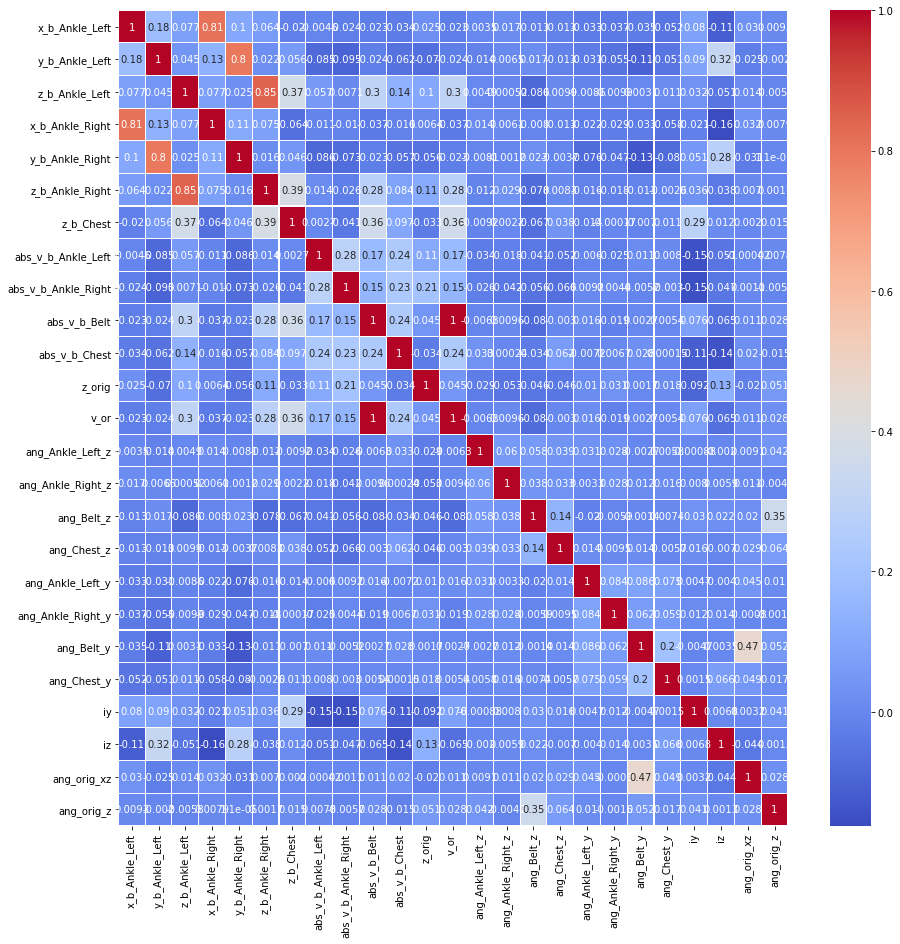

In [40]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(15,15))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [41]:
# Dropping the v_or from attributes
BA.drop(columns=['v_or'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   z_b_Chest            5227 non-null   float64
 7   abs_v_b_Ankle_Left   5227 non-null   float64
 8   abs_v_b_Ankle_Right  5227 non-null   float64
 9   abs_v_b_Belt         5227 non-null   float64
 10  abs_v_b_Chest        5227 non-null   float64
 11  z_orig               5227 non-null   float64
 12  ang_Ankle_Left_z     5227 non-null   float64
 13  ang_Ankle_Right_z    5227 non-null   float64
 14  ang_Belt_z           5227 non-null   float64
 15  ang_Chest_z          5227 non-null   f

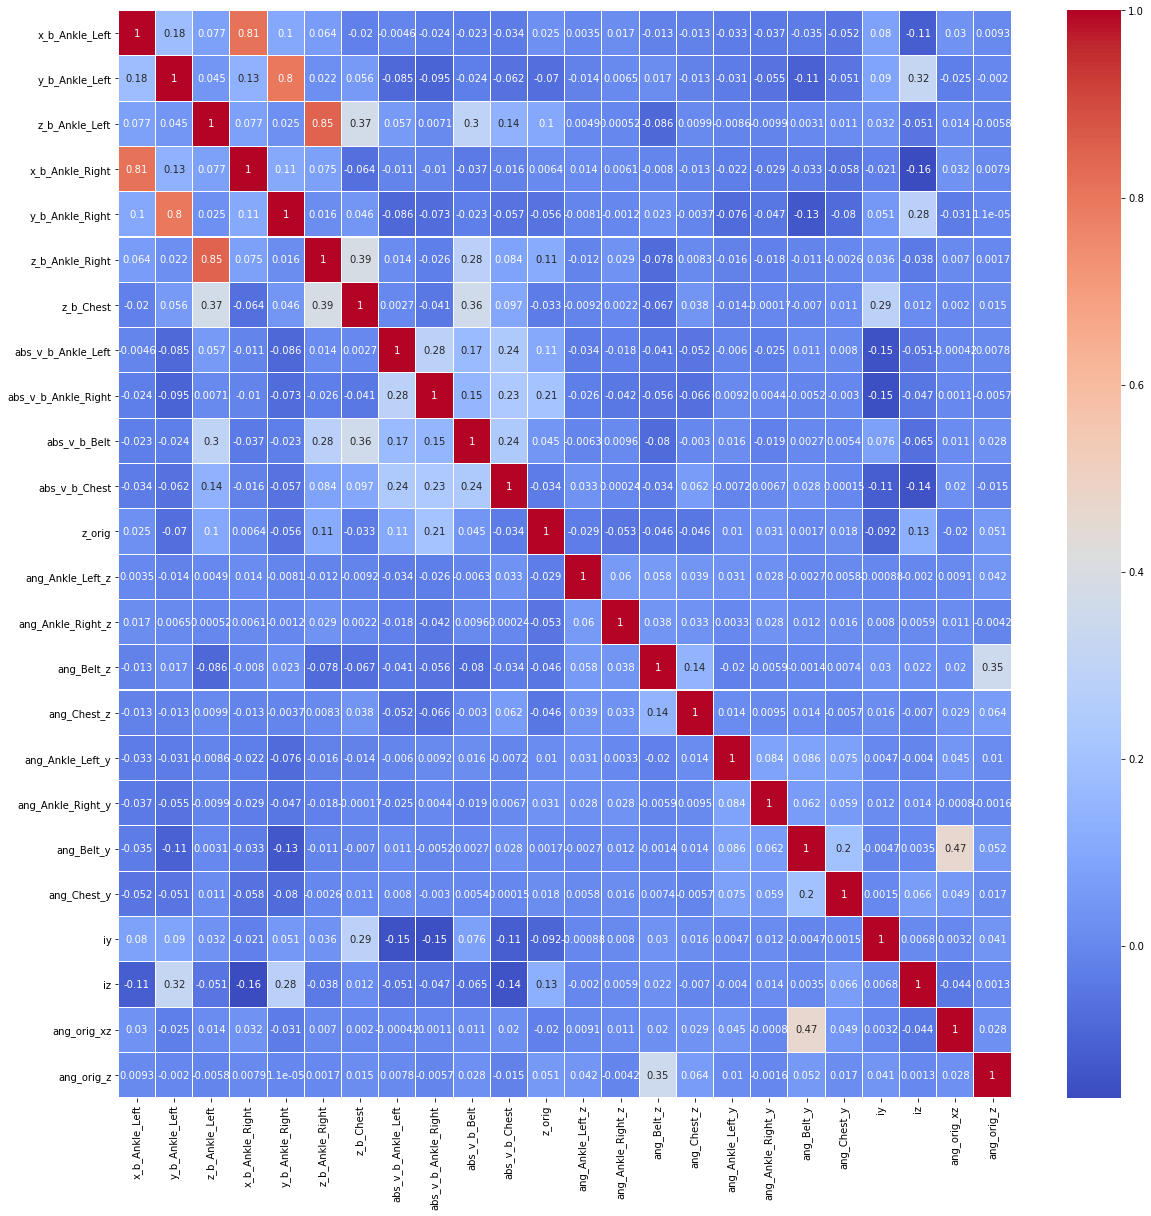

In [42]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [43]:
# Creating dataframe for reference and body both and dropping common columns
RA_BA = pd.concat([RA.reset_index(drop=True), BA], axis=1)
RA_BA.drop(columns=['z_orig'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5227 non-null   float64
 1   z_Ankle_Right                    5227 non-null   float64
 2   z_Belt                           5227 non-null   float64
 3   z_Chest                          5227 non-null   float64
 4   vz_Ankle_Left                    5227 non-null   float64
 5   vz_Ankle_Right                   5227 non-null   float64
 6   vz_Belt                          5227 non-null   float64
 7   vz_Chest                         5227 non-null   float64
 8   abs_v_Ankle_Left                 5227 non-null   float64
 9   abs_v_Ankle_Right                5227 non-null   float64
 10  abs_v_Belt                       5227 non-null   float64
 11  abs_v_Chest                      5227 non-null   float64
 12  abs_dist_Ankle_Left_

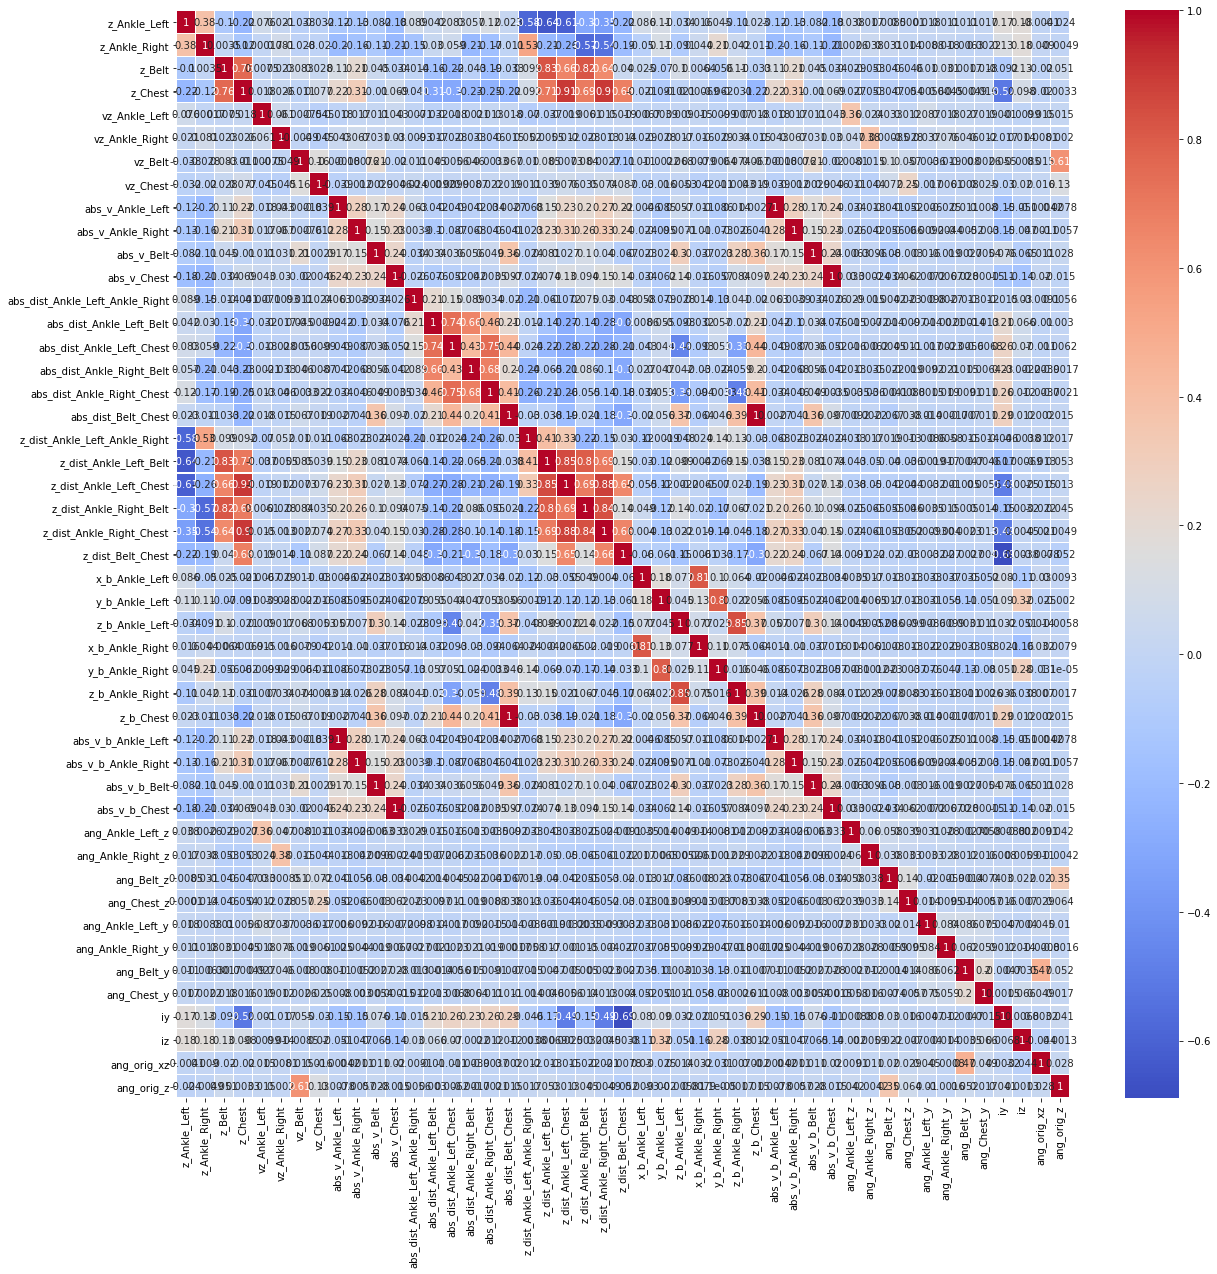

In [44]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [45]:
# Dropping correlated features
RA_BA.drop(columns=['abs_v_b_Ankle_Left', 'abs_v_b_Ankle_Right', 'abs_v_b_Belt', 'abs_v_b_Chest', 'z_b_Chest'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5227 non-null   float64
 1   z_Ankle_Right                    5227 non-null   float64
 2   z_Belt                           5227 non-null   float64
 3   z_Chest                          5227 non-null   float64
 4   vz_Ankle_Left                    5227 non-null   float64
 5   vz_Ankle_Right                   5227 non-null   float64
 6   vz_Belt                          5227 non-null   float64
 7   vz_Chest                         5227 non-null   float64
 8   abs_v_Ankle_Left                 5227 non-null   float64
 9   abs_v_Ankle_Right                5227 non-null   float64
 10  abs_v_Belt                       5227 non-null   float64
 11  abs_v_Chest                      5227 non-null   float64
 12  abs_dist_Ankle_Left_

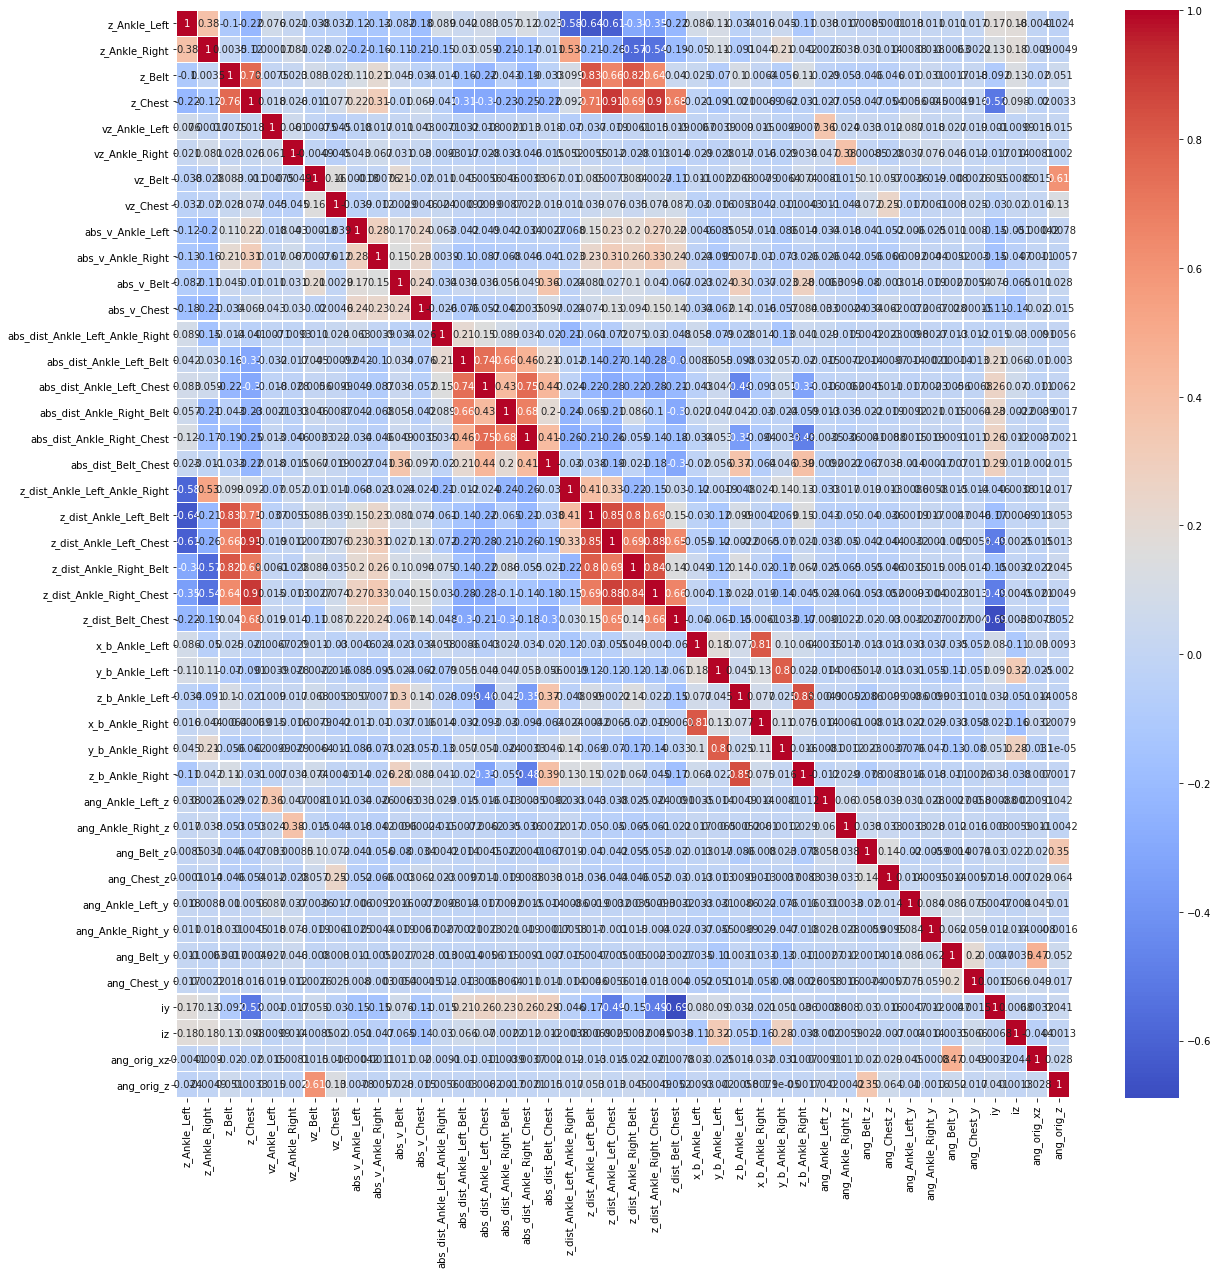

In [46]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [47]:
# Defining Angle attributes between upper torso and lower torso considering both left and righ angles
ut_x, ut_y, ut_z = (df['x_Chest']-df['x_Belt']), (df['y_Chest']-df['y_Belt']), (df['z_Chest']-df['z_Belt'])
lt_r_x, lt_r_y, lt_r_z = (df['x_Ankle_Right']-df['x_Belt']), (df['y_Ankle_Right']-df['z_Belt']), (df['z_Ankle_Right']-df['z_Belt'])
lt_l_x, lt_l_y, lt_l_z = (df['x_Ankle_Left']-df['x_Belt']), (df['y_Ankle_Left']-df['z_Belt']), (df['z_Ankle_Left']-df['z_Belt'])

mod_ut = np.sqrt(ut_x**2+ut_y**2+ut_z**2)
mod_lt_r = np.sqrt(lt_r_x**2+lt_r_y**2+lt_r_z**2)
mod_lt_l = np.sqrt(lt_l_x**2+lt_l_y**2+lt_l_z**2)
ang_r = (ut_x.multiply(lt_r_x, axis=0)+ut_y.multiply(lt_r_y, axis=0)+ut_z.multiply(lt_r_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_r, axis=0)
ang_l = (ut_x.multiply(lt_l_x, axis=0)+ut_y.multiply(lt_l_y, axis=0)+ut_z.multiply(lt_l_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_l, axis=0)

AA = pd.DataFrame({'angle_left':ang_l, 'angle_right':ang_r})
AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5227 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   angle_left   5227 non-null   float64
 1   angle_right  5227 non-null   float64
dtypes: float64(2)
memory usage: 122.5 KB


In [48]:
# Adding angle attributes with other attributes
RA_AA = pd.concat([RA, AA], axis=1)
RA_AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5227 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5227 non-null   float64
 1   z_Ankle_Right                    5227 non-null   float64
 2   z_Belt                           5227 non-null   float64
 3   z_Chest                          5227 non-null   float64
 4   vz_Ankle_Left                    5227 non-null   float64
 5   vz_Ankle_Right                   5227 non-null   float64
 6   vz_Belt                          5227 non-null   float64
 7   vz_Chest                         5227 non-null   float64
 8   abs_v_Ankle_Left                 5227 non-null   float64
 9   abs_v_Ankle_Right                5227 non-null   float64
 10  abs_v_Belt                       5227 non-null   float64
 11  abs_v_Chest                      5227 non-null

In [49]:
BA_AA = pd.concat([BA, AA.reset_index(drop=True)], axis=1)
BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5227 non-null   float64
 1   y_b_Ankle_Left       5227 non-null   float64
 2   z_b_Ankle_Left       5227 non-null   float64
 3   x_b_Ankle_Right      5227 non-null   float64
 4   y_b_Ankle_Right      5227 non-null   float64
 5   z_b_Ankle_Right      5227 non-null   float64
 6   z_b_Chest            5227 non-null   float64
 7   abs_v_b_Ankle_Left   5227 non-null   float64
 8   abs_v_b_Ankle_Right  5227 non-null   float64
 9   abs_v_b_Belt         5227 non-null   float64
 10  abs_v_b_Chest        5227 non-null   float64
 11  z_orig               5227 non-null   float64
 12  ang_Ankle_Left_z     5227 non-null   float64
 13  ang_Ankle_Right_z    5227 non-null   float64
 14  ang_Belt_z           5227 non-null   float64
 15  ang_Chest_z          5227 non-null   f

In [50]:
RA_BA_AA = pd.concat([RA_BA, AA.reset_index(drop=True)], axis=1)
RA_BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5227 non-null   float64
 1   z_Ankle_Right                    5227 non-null   float64
 2   z_Belt                           5227 non-null   float64
 3   z_Chest                          5227 non-null   float64
 4   vz_Ankle_Left                    5227 non-null   float64
 5   vz_Ankle_Right                   5227 non-null   float64
 6   vz_Belt                          5227 non-null   float64
 7   vz_Chest                         5227 non-null   float64
 8   abs_v_Ankle_Left                 5227 non-null   float64
 9   abs_v_Ankle_Right                5227 non-null   float64
 10  abs_v_Belt                       5227 non-null   float64
 11  abs_v_Chest                      5227 non-null   float64
 12  abs_dist_Ankle_Left_

#### Now we have 6 feature attributes
1. Reference Attributes (RA)
2. Body Attributes (BA)
3. Angle attributes (AA)
4. Reference+Body (RA_BA)
5. Reference+Angle (RA_AA)
6. Body+Angle (BA_AA)
7. Reference+Body+Angle(RA_BA_AA)

#### Let us now scale all the features using standard scalar and split the data to training and test data

#### In this project since there are imbalance classes we will apply one more preprocessing technique i.e. Synthetic Minority Oversampling Technique

#### The important point to be noticed in preprocessing is that all the preprocessing techniques will be applied only on training data and test data will be like the unseen data for prediction only

In literatures they have done 10-fold Cross Validation and reported the accuracies but in this project 10-fold CV will be applied only to training data and further accuracies will be reported by predicting the test data.

In [51]:
# Import Standard Scaler and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [52]:
# Before scaling and splitting lets define our output variable i.e. y which is activity column of dataframe
y = df['activity']
print(y.describe())
y.head()

count      5227
unique       11
top       lying
freq       1752
Name: activity, dtype: object


date
2009-05-27 14:03:25         walking
2009-05-27 14:03:26         walking
2009-05-27 14:03:27         walking
2009-05-27 14:03:28         walking
2009-05-27 14:03:29    sitting down
Name: activity, dtype: object

In [53]:
# 1. Preprocessing the reference attributes
X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(RA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA = StandardScaler()
X_train_RA_scaled = scaler_RA.fit_transform(X_train_RA)
X_train_RA_scaled_smote, y_RA_smote = SMOTE().fit_resample(X_train_RA_scaled, y_train_RA)
print(y_RA_smote.value_counts())
print(X_train_RA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 24)


In [54]:
# 2. Preprocessing the body attributes
X_train_BA, X_test_BA, y_train_BA, y_test_BA = train_test_split(BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA = StandardScaler()
X_train_BA_scaled = scaler_BA.fit_transform(X_train_BA)
X_train_BA_scaled_smote, y_BA_smote = SMOTE().fit_resample(X_train_BA_scaled, y_train_BA)
print(y_BA_smote.value_counts())
print(X_train_BA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 24)


In [55]:
# 3. Preprocessing the angle attributes
X_train_AA, X_test_AA, y_train_AA, y_test_AA = train_test_split(AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_AA = StandardScaler()
X_train_AA_scaled = scaler_AA.fit_transform(X_train_AA)
X_train_AA_scaled_smote, y_AA_smote = SMOTE().fit_resample(X_train_AA_scaled, y_train_AA)
print(y_AA_smote.value_counts())
print(X_train_AA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 2)


In [56]:
# 4. Preprocessing the reference+body attributes
X_train_RA_BA, X_test_RA_BA, y_train_RA_BA, y_test_RA_BA = train_test_split(RA_BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA = StandardScaler()
X_train_RA_BA_scaled = scaler_RA_BA.fit_transform(X_train_RA_BA)
X_train_RA_BA_scaled_smote, y_RA_BA_smote = SMOTE().fit_resample(X_train_RA_BA_scaled, y_train_RA_BA)
print(y_RA_BA_smote.value_counts())
print(X_train_RA_BA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 42)


In [57]:
# 5. Preprocessing the reference+angle attributes
X_train_RA_AA, X_test_RA_AA, y_train_RA_AA, y_test_RA_AA = train_test_split(RA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_AA = StandardScaler()
X_train_RA_AA_scaled = scaler_RA_AA.fit_transform(X_train_RA_AA)
X_train_RA_AA_scaled_smote, y_RA_AA_smote = SMOTE().fit_resample(X_train_RA_AA_scaled, y_train_RA_AA)
print(y_RA_AA_smote.value_counts())
print(X_train_RA_AA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 26)


In [58]:
# 6. Preprocessing the body+angle attributes
X_train_BA_AA, X_test_BA_AA, y_train_BA_AA, y_test_BA_AA = train_test_split(BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA_AA = StandardScaler()
X_train_BA_AA_scaled = scaler_BA_AA.fit_transform(X_train_BA_AA)
X_train_BA_AA_scaled_smote, y_BA_AA_smote = SMOTE().fit_resample(X_train_BA_AA_scaled, y_train_BA_AA)
print(y_BA_AA_smote.value_counts())
print(X_train_BA_AA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 26)


In [59]:
# 7. Preprocessing the reference+body+angle attributes
X_train_RA_BA_AA, X_test_RA_BA_AA, y_train_RA_BA_AA, y_test_RA_BA_AA = train_test_split(RA_BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA_AA = StandardScaler()
X_train_RA_BA_AA_scaled = scaler_RA_BA_AA.fit_transform(X_train_RA_BA_AA)
X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote = SMOTE().fit_resample(X_train_RA_BA_AA_scaled, y_train_RA_BA_AA)
print(y_RA_BA_AA_smote.value_counts())
print(X_train_RA_BA_AA_scaled_smote.shape)

standing up from lying                    1314
falling                                   1314
standing up from sitting                  1314
standing up from sitting on the ground    1314
lying down                                1314
walking                                   1314
on all fours                              1314
sitting                                   1314
sitting on the ground                     1314
lying                                     1314
sitting down                              1314
Name: activity, dtype: int64
(14454, 44)


#### It is pertinent to mention in the conclusion of this preprocessing exercise that the same procedure will be followed for the clean data (i.e. data smoothened with Kalman Filter)